<center><h1>SCI Classification

**Overview:** The below notebook contains the exploratory data analysis for the SCI dataset related to the autonomic capacities of various spinal cord injuried (SCI) participants. The goal of this experiment is to classify the injury level of SCI participants as either Tetra or Para. The objective of this notebook is to gain a better understanding of which features may correlate with and ultimately predict the target variable. 

In [64]:
# import libraries to be used throughout project
import pandas as pd
import numpy as np
import matplotlib 
import math
from matplotlib import pylab as plt
import seaborn as sns

In [65]:
# import sci dataset for analysis
df = pd.read_csv('../data/sci_all_participants.csv')
df.drop(['ID'],axis=1,inplace=True)

df.head()

,Group,OH_SBP,OH_DBP,V1_SV_Pre,V1_SV_Post,V1_SV_Diff,V2_SV_Pre,V2_SV_Post,V2_SV_Diff,SBP_BL_1_mean,...,V2_vLF_DB,V2_SBP_HF_DB,V2_SBP_LF_DB,V2_SBP_vLF_DB,V2_alpha_HF_DB,V2_alpha_LF_DB,V2_avg_alpha_DB,V2_RR_VAR_DB,V2_RMSD_DB,V2_IBI_DB
0,Tetra,5,7,8.00,20.00,12.00,8.00,20.00,12.00,117.8,...,419379.53,24.80,53.64,26371.32,1.83,2.44,2.14,2373.00,26.68,615.95
1,Para,0,2,13.03,27.11,14.08,13.09,25.59,12.50,143.2,...,989603.90,31.91,45.63,107.30,2.71,9.01,5.86,3974.26,28.16,924.91
2,Para,0,9,13.19,30.29,17.10,13.32,28.57,15.25,136.8,...,866983.55,1.37,45.25,10924.33,5.77,3.93,4.85,1513.52,13.81,857.91
3,Para,1,2,13.21,26.65,13.44,13.55,26.40,12.85,113.4,...,746316.77,1.09,66.15,22861.51,22.50,12.21,17.36,7286.49,60.99,806.41
4,Para,0,1,13.27,26.97,13.70,12.55,26.85,14.30,105.8,...,738151.78,1.28,90.05,22257.26,32.33,11.90,22.11,7810.70,63.30,791.65


<h2>Exploratory Data Analysis</h2>

  Perform early data analysis to better understand the distribution of the dataset, as well as the target variable. This step will inform our process for splitting and preprocessing the data.
  

In [66]:
print('Number of datapoints in dataset:',df.shape[0])
print('Number of features in dataset:',df.shape[1])

Number of datapoints in dataset: 108
Number of features in dataset: 141


In [67]:
# list datatypes for each feature
with pd.option_context('display.max_rows',None):
    print(df.dtypes)

Group               object
OH_SBP               int64
OH_DBP               int64
V1_SV_Pre          float64
V1_SV_Post         float64
V1_SV_Diff         float64
V2_SV_Pre          float64
V2_SV_Post         float64
V2_SV_Diff         float64
SBP_BL_1_mean      float64
SBP_BL_1_std       float64
SBP_POS_1_mean     float64
SBP_POS_1_std      float64
SBP_ch_1_mean      float64
SBP_ch_1_std       float64
SBP_BL_2_mean      float64
SBP_BL_2_std       float64
SBP_POS_2_mean     float64
SBP_POS_2_std      float64
SBP_ch_2_mean      float64
SBP_ch_2_std       float64
DBP_BL_1_mean      float64
DBP_BL_1_std       float64
DBP_POS_1_mean     float64
DBP_POS_1_std      float64
DBP_ch_1_mean      float64
DBP_ch_1_std       float64
DBP_BL_2_mean      float64
DBP_BL_2_std       float64
DBP_POS_2_mean     float64
DBP_POS_2_std      float64
DBP_ch_2_mean      float64
DBP_ch_2_std       float64
HR_BL_1_mean       float64
HR_BL_1_std        float64
HR_POS_1_mean      float64
HR_POS_1_std       float64
H

<h2>Analysis of the Target Variable</h2>

In [68]:
# create vector for the target variable
y = df['Group']

print('Target data type:',y.dtypes)

# 108 total participants (datapoints)
y.describe()

Target data type: object


count      108
unique       2
top       Para
freq        64
Name: Group, dtype: object

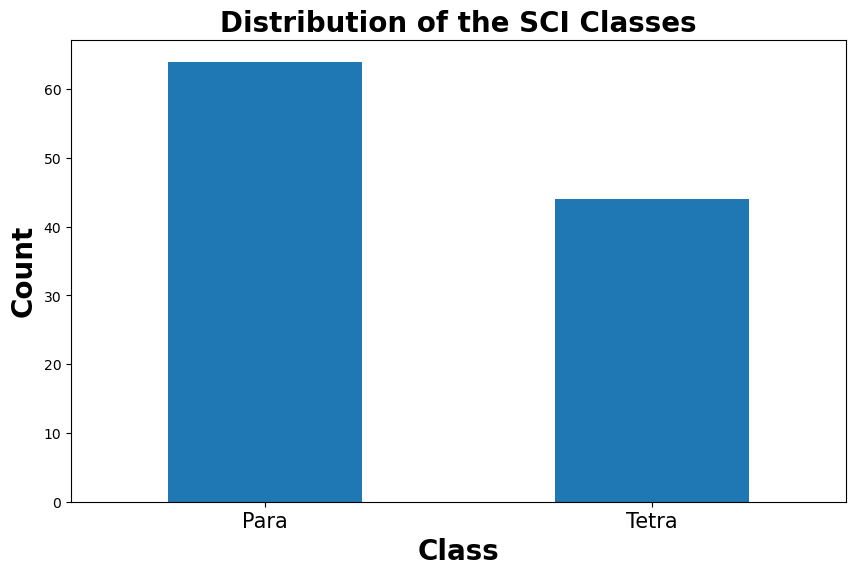

In [69]:
plt.figure(figsize=(10,6))

# create barplot for the distribution of the target variable
y.value_counts().plot.bar()

# label and show 
plt.xlabel('Class', weight='bold',fontsize=20)
plt.xticks(rotation =0,fontsize=15)
plt.ylabel('Count',weight='bold',fontsize=20)
plt.title('Distribution of the SCI Classes', weight='bold',fontsize=20)
plt.savefig(fname='../figures/class_histogram',format='png',dpi=300)
plt.show()

**Barplot of the Target Variable:** The barplot of the target variable shows that the classes are relatively unevenly distributed throughout the dataset, as the Para group accounts for almost 2/3 of the data. From this analysis we observe that a stratified split will be necessary to ensure each dataset (train, test, val) has a proportionate amount of datapoints from each class. 

<h2>Feature Exploration </h2>

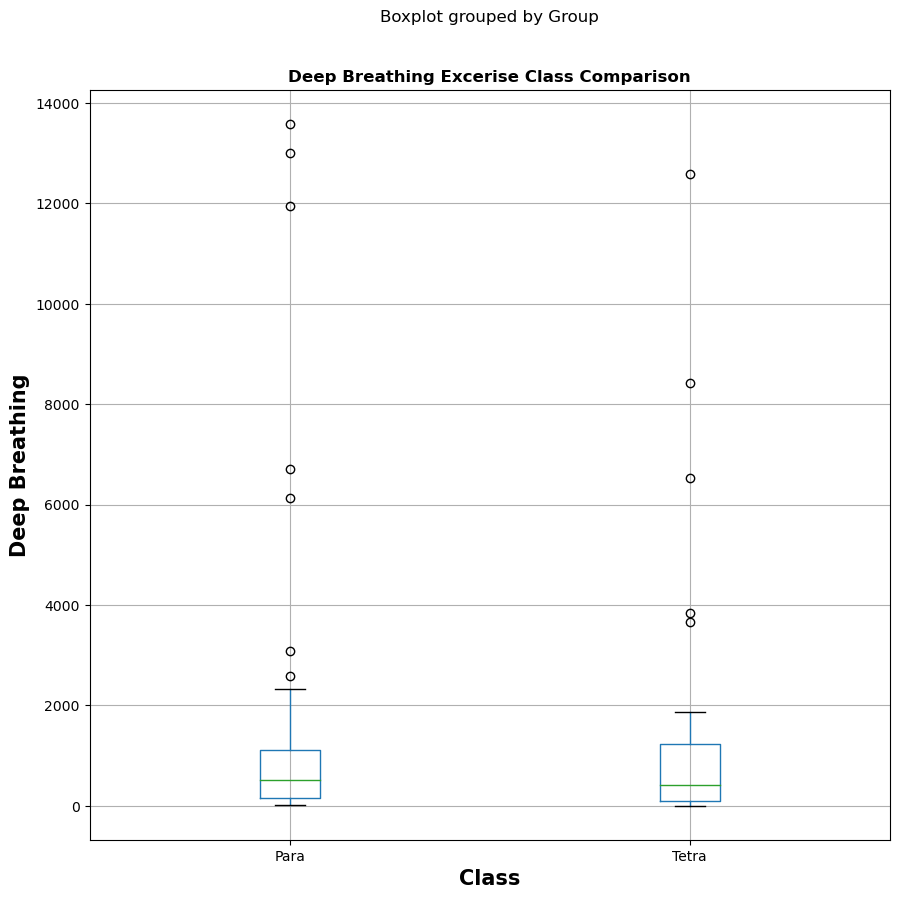

In [70]:
# create boxplot for deep breathing group comparisons 
df[['V1_HF_DB','Group']].boxplot(by='Group')

# plot and label graph
plt.ylabel('Deep Breathing',weight='bold',fontsize=15)
plt.title('Deep Breathing Excerise Class Comparison', weight='bold')
plt.xlabel('Class',weight='bold',fontsize=15)
plt.savefig(fname='../figures/DB_boxplot',format='png',dpi=300)
plt.show()

**Analysis:** The above boxplot shows the class comparison for the deep breathing excerise performed by the SCI participants of this study. From the plot we can see that both classes share similar trends in their deep breathing capactities. As such, this feature may not be highly predictive of the SCI class, as all participants demonstrate similar measurements for this excerise, despite class designation.

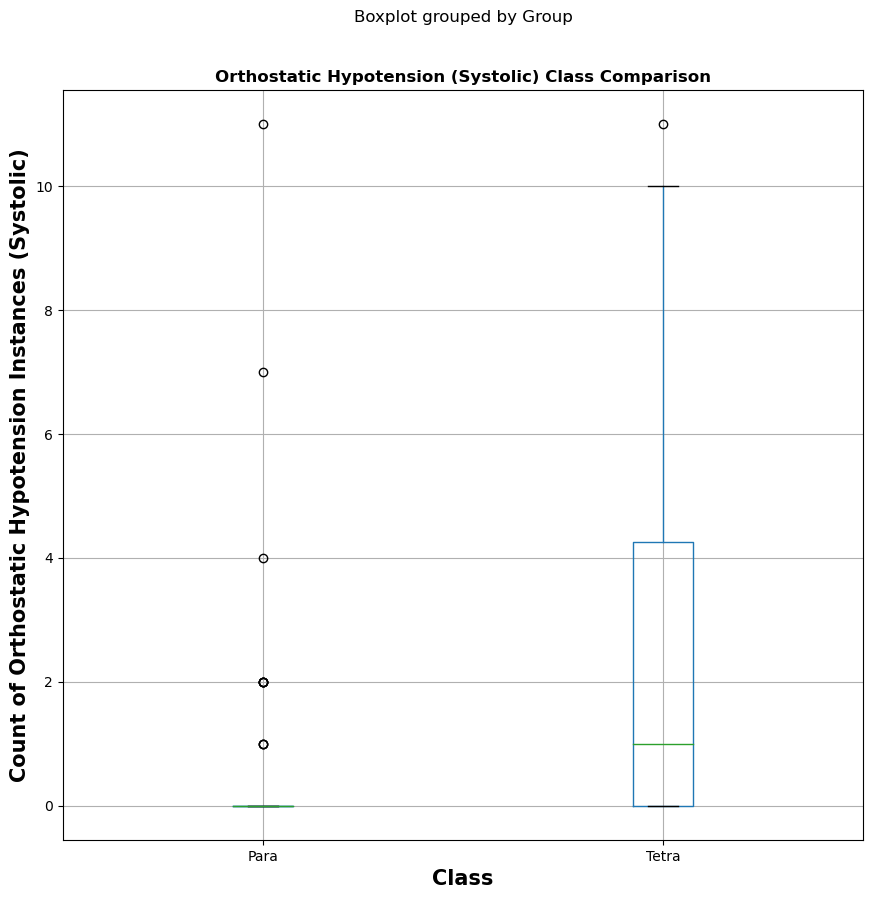

In [71]:
# create boxplot for BP comparison
df[['OH_SBP','Group']].boxplot(by='Group')

# plot and label graph
plt.ylabel('Count of Orthostatic Hypotension Instances (Systolic)',weight='bold',fontsize=15)
plt.title('Orthostatic Hypotension (Systolic) Class Comparison', weight='bold')
plt.xlabel('Class',weight='bold',fontsize=15)
plt.savefig(fname='../figures/OH_boxplot',format='png',dpi=300)
plt.show()

**Analysis:** The above boxplot shows the comparison for the count of orthostatic hypotension instances between SCI groups. From the plot we can see that the Tetra group tends to have more instances of hypotension, as its median count is higher than the Para group. Additionally, the Tetra group appears to have a wider range of hypotension instances, indictating that hypotension instances are more variable in the Tetra group than the Para group. From this analysis we can observe that the hypotension instances may be a good indicator of class distinction. 

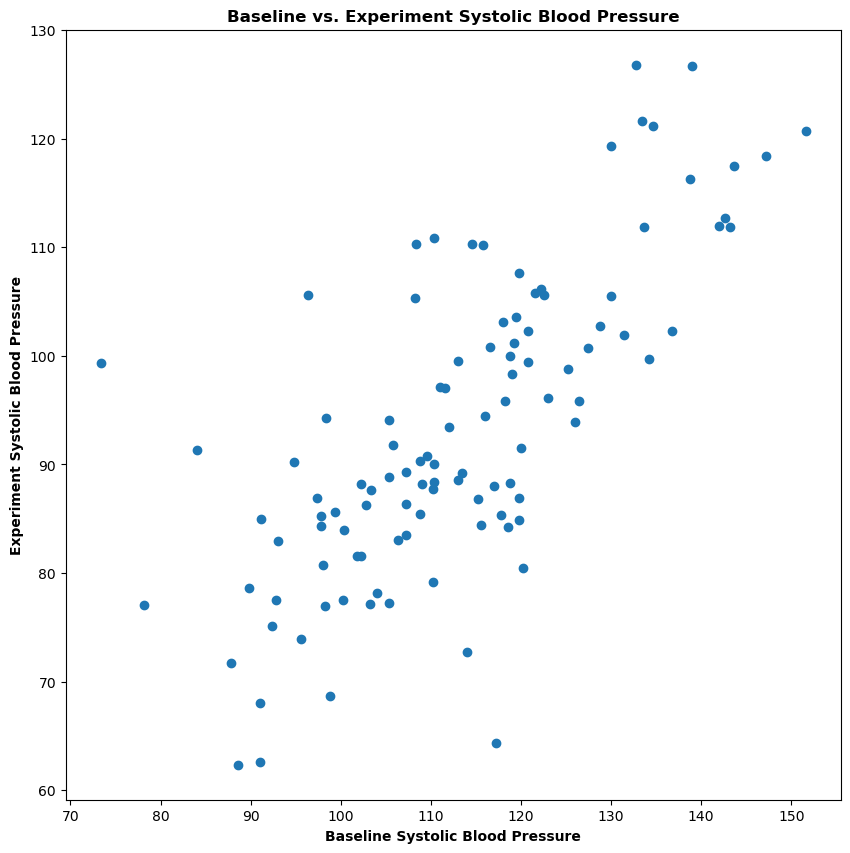

In [72]:
# create scatter plot of systolic baseline vs. 
plt.scatter(df['SBP_BL_1_mean'],df['SBP_POS_1_mean'])

# plot and label the graph 
plt.title('Baseline vs. Experiment Systolic Blood Pressure',weight='bold')
plt.xlabel('Baseline Systolic Blood Pressure',weight='bold')
plt.ylabel('Experiment Systolic Blood Pressure',weight='bold')
plt.savefig(fname='../figures/BL_vs_Ex_Systolic',format='png',dpi=300)
plt.show()

**Analysis:** The above scatter plot illustrates the correlation between baseline systolic blood pressure and the experiment systolic blood pressure. The plot indicates that there exists a positive correlation between the two variables, as a higher baseline blood pressure amounts to a higher experimental blood pressure.

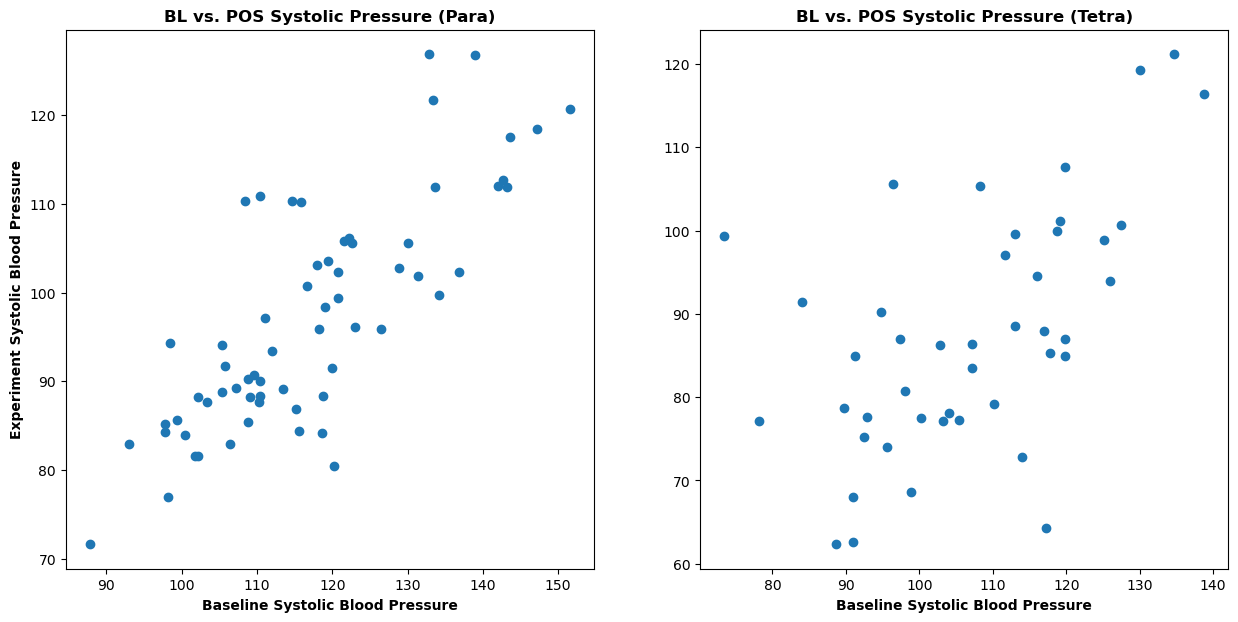

In [75]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)
figure.set_figheight(7)
figure.set_figwidth(15)

#  create class dataframes for plotting
tetra = df[df['Group']=='Tetra']
para = df[df['Group']=='Para']

# plot the para scatter 
axis[0].scatter(para['SBP_BL_1_mean'],para['SBP_POS_1_mean'])
axis[0].set_title("BL vs. POS Systolic Pressure (Para)",weight = 'bold')
axis[0].set_xlabel('Baseline Systolic Blood Pressure',weight='bold')
axis[0].set_ylabel('Experiment Systolic Blood Pressure',weight='bold')

# plot the tetra scatter 
axis[1].scatter(tetra['SBP_BL_1_mean'],tetra['SBP_POS_1_mean'])
axis[1].set_title("BL vs. POS Systolic Pressure (Tetra)",weight = 'bold')
axis[1].set_xlabel('Baseline Systolic Blood Pressure',weight='bold')

plt.savefig(fname='../figures/Para_Tetra_BL_Comp',format='png',dpi=300)

plt.show()

**Analysis:** The above scatter plots illustrate the correlations between baseline and experimental systolic blood pressures for both the Para and Tetra classes. We can observe from these plots that there exists a positive correlation between these blood pressures for both classes. However, the Para classes shows a much stronger correlation between blood pressure measurements than the Tetra class. This tells us that the Tetra group's baseline blood pressure explains less of the variation in its experimental blood pressure than the Para group's measurements.

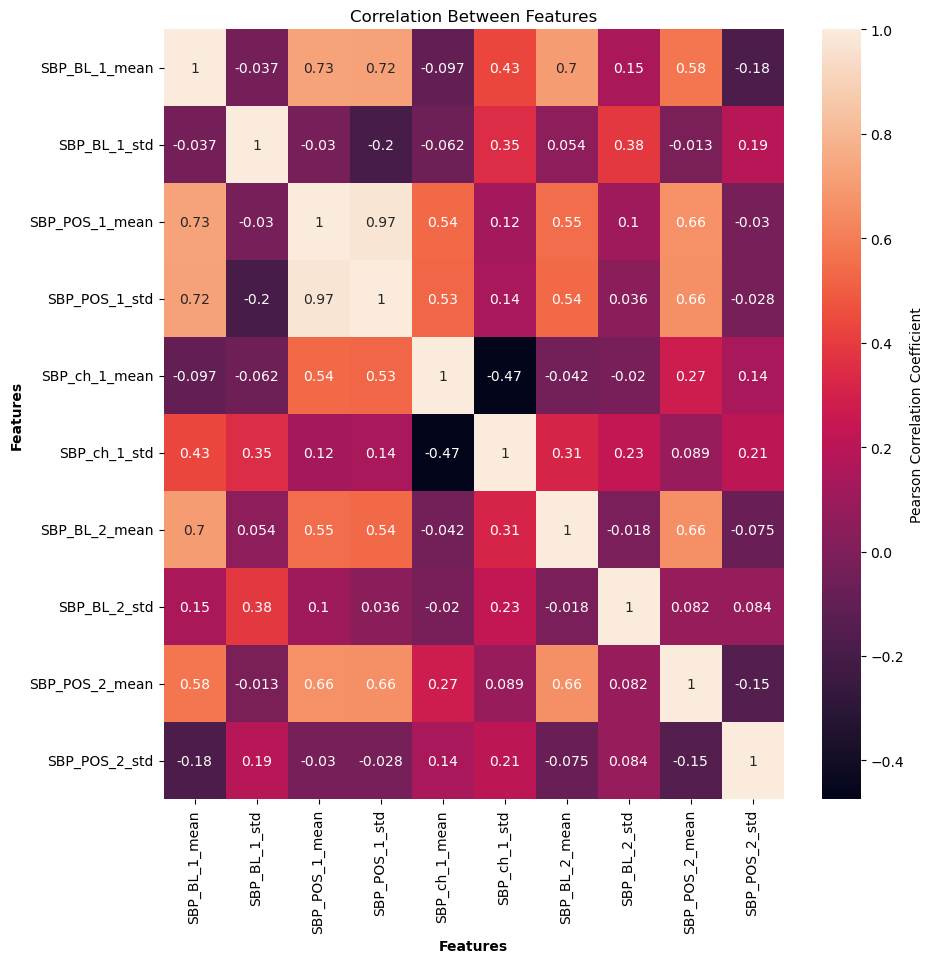

In [74]:
# columns for systolic BP 
SBP = df.columns[9:19]
# create dataframe for analysis
df_SBP = df[SBP]

# create correlations between features 
pear_corr = df_SBP.corr(method='pearson')
sns.heatmap(pear_corr, annot=True, cbar_kws={'label': 'Pearson Correlation Coefficient'})

# plot and label
plt.title('Correlation Between Features')
plt.xlabel('Features',weight='bold')
plt.ylabel('Features',weight='bold')
plt.savefig(fname='../figures/feature_correlation_coefficients',format='png')
plt.show()